# Fake Review Generation on the Yelp Dataset: Dataset Exploration

More information on the Yelp dataset: https://www.yelp.com/dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
#!tar -xvf /content/drive/MyDrive/YelpDataset/yelp_dataset.tar

In [ ]:
!ls /content/drive/MyDrive/YelpDataset/

dataframes			     yelp_academic_dataset_review.json
Dataset_User_Agreement.pdf	     yelp_academic_dataset_tip.json
models				     yelp_academic_dataset_user.json
yelp_academic_dataset_business.json  yelp_dataset.tar
yelp_academic_dataset_checkin.json


In [ ]:
#%cp /content/yelp_academic_dataset_review.json /content/drive/MyDrive/YelpDataset

In [ ]:
%cp /content/drive/MyDrive/YelpDataset/yelp_academic_dataset_review.json /content/
%cp /content/drive/MyDrive/YelpDataset/yelp_academic_dataset_business.json /content/

Follow this to import data: https://towardsdatascience.com/converting-yelp-dataset-to-csv-using-pandas-2a4c8f03bd88 . Below work is adapted from the following link.

In [ ]:
import pandas as pd

In [ ]:
business_json_path = '/content/yelp_academic_dataset_business.json'
df_b = pd.read_json(business_json_path, lines=True)

In [ ]:
df_b.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
"""business_RV = df_b[df_b['categories'].str.contains(
              'RV Repair|RV Dealers|RV Rental|RV Parks|Campgrounds',
              case=False, na=False)]
business_RV.head()"""

"business_RV = df_b[df_b['categories'].str.contains(\n              'RV Repair|RV Dealers|RV Rental|RV Parks|Campgrounds',\n              case=False, na=False)]\nbusiness_RV.head()"

In [ ]:
# 1 = open, 0 = closed
df_b = df_b[df_b['is_open']==1]
drop_columns = ['hours','is_open','review_count']
df_b = df_b.drop(drop_columns, axis=1)

In [ ]:
# Make sure the Pandas version is above 0.25
# If not, upgrade Pandas version
# !pip3 install --upgrade pandas
pd.__version__

'1.3.5'

In [ ]:
df_explode = df_b.assign(categories = df_b.categories
                         .str.split(', ')).explode('categories')

In [ ]:
print("Top 10 Categories")
print(df_explode.categories.value_counts()[:10])

Top 10 Categories
Restaurants                  34987
Food                         20419
Shopping                     20186
Home Services                13322
Beauty & Spas                12263
Health & Medical             11046
Local Services               10138
Automotive                    9879
Nightlife                     8379
Event Planning & Services     8173
Name: categories, dtype: int64


In [ ]:
df_explode.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,attributes,categories
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,{'BusinessAcceptsCreditCards': 'True'},Shipping Centers


In [ ]:
review_json_path = '/content/yelp_academic_dataset_review.json'

In [ ]:
size = 100000
review = pd.read_json(review_json_path, lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)

In [ ]:
"""catDF = df_explode[df_explode['categories'].str.contains('Home Services',
              case=False, na=False)]
catDF.head(5)"""

"catDF = df_explode[df_explode['categories'].str.contains('Home Services',\n              case=False, na=False)]\ncatDF.head(5)"

In [ ]:
cats = df_explode.categories.value_counts()[:10].index
cats

Index(['Restaurants', 'Food', 'Shopping', 'Home Services', 'Beauty & Spas',
       'Health & Medical', 'Local Services', 'Automotive', 'Nightlife',
       'Event Planning & Services'],
      dtype='object')

In [ ]:
# There are multiple chunks to be read
chunk_list = []
for chunk_review in review:
    # Drop columns that aren't needed
    chunk_review = chunk_review.drop(['review_id','useful','funny','cool'], axis=1)
    # Renaming column name to avoid conflict with business overall star rating
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    # Inner merge with edited business file so only reviews related to the business remain
    #chunk_merged = pd.merge(business_RV, chunk_review, on='business_id', how='inner')
    for cat in cats:
      catDF = df_explode[df_explode['categories'].str.contains(cat,
              case=False, na=False)]
      chunk_merged = pd.merge(catDF, chunk_review, on='business_id', how='inner')
      # Show feedback on progress
      #print(f"{chunk_merged.shape[0]} out of {size:,} related reviews within the {cat} category")
      chunk_list.append(chunk_merged)
      del catDF
# After trimming down the review file, concatenate all relevant data back to one dataframe
df = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)
#chunk_list

In [ ]:
#if you don't want to include categories use this by uncommenting:
"""
# There are multiple chunks to be read
chunk_list = []
for chunk_review in review:
    # Drop columns that aren't needed
    chunk_review = chunk_review.drop(['review_id','useful','funny','cool'], axis=1)
    # Renaming column name to avoid conflict with business overall star rating
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    # Inner merge with edited business file so only reviews related to the business remain
    #chunk_merged = pd.merge(business_RV, chunk_review, on='business_id', how='inner')
    # Show feedback on progress
    #print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_review)
# After trimming down the review file, concatenate all relevant data back to one dataframe
#df = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)
#chunk_list
"""

'\n# There are multiple chunks to be read\nchunk_list = []\nfor chunk_review in review:\n    # Drop columns that aren\'t needed\n    chunk_review = chunk_review.drop([\'review_id\',\'useful\',\'funny\',\'cool\'], axis=1)\n    # Renaming column name to avoid conflict with business overall star rating\n    chunk_review = chunk_review.rename(columns={\'stars\': \'review_stars\'})\n    # Inner merge with edited business file so only reviews related to the business remain\n    #chunk_merged = pd.merge(business_RV, chunk_review, on=\'business_id\', how=\'inner\')\n    # Show feedback on progress\n    #print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")\n    chunk_list.append(chunk_review)\n# After trimming down the review file, concatenate all relevant data back to one dataframe\n#df = pd.concat(chunk_list, ignore_index=True, join=\'outer\', axis=0)\n#chunk_list\n'

In [ ]:
#df = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

In [ ]:
df[225000:2250010]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,attributes,categories,user_id,review_stars,text,date
225000,SNQ8sn7R9_e92GWKMCNSgg,O! Wing Plus,10094 Page Ave,Saint Louis,MO,63132,38.690649,-90.381956,4.5,"{'RestaurantsAttire': 'u'casual'', 'GoodForKid...",Food,jMUP_N1YgmnobN09ZjGtsw,5,They do have the best wings here. Their secre...,2017-07-25 03:14:32
225001,rDO6cfeiC3X1FATlNJW-wA,The Fudgery,1 Poydras St,New Orleans,LA,70112,29.949427,-90.062800,3.5,"{'BusinessParking': '{'garage': True, 'street'...",Specialty Food,_BjiWHxDYvHfLW53Y4dDXQ,2,This place is bad in so many ways.\n1. Employe...,2015-11-25 22:51:48
225002,rDO6cfeiC3X1FATlNJW-wA,The Fudgery,1 Poydras St,New Orleans,LA,70112,29.949427,-90.062800,3.5,"{'BusinessParking': '{'garage': True, 'street'...",Specialty Food,SY7Rx9l2uGyM5A6i0PecXQ,5,We had a great time there. They were very frie...,2015-07-10 13:38:27
225003,rDO6cfeiC3X1FATlNJW-wA,The Fudgery,1 Poydras St,New Orleans,LA,70112,29.949427,-90.062800,3.5,"{'BusinessParking': '{'garage': True, 'street'...",Specialty Food,k49XnUNhwa_jRdhaG4uE6Q,5,Probably the best store inside the Riverwalk. ...,2011-09-06 20:58:21
225004,rDO6cfeiC3X1FATlNJW-wA,The Fudgery,1 Poydras St,New Orleans,LA,70112,29.949427,-90.062800,3.5,"{'BusinessParking': '{'garage': True, 'street'...",Specialty Food,-bSxAJOu11_jUjKo7pgK2Q,5,This was BY FAR my favorite place on my NOLA t...,2016-08-12 04:07:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250005,f8ss-XDpkdwwbQf0-V6JCA,Crawfish Asian Cuisine,"1296 E Plumb Ln, Ste H",Reno,NV,89502,39.505125,-119.782100,4.5,"{'CoatCheck': 'False', 'Music': '{'dj': False}...",Seafood,xBrulTE1C_Vv-IDt8S0_9A,5,Delicious crawfish excellent service and ni...,2015-12-28 22:54:53
2250006,f8ss-XDpkdwwbQf0-V6JCA,Crawfish Asian Cuisine,"1296 E Plumb Ln, Ste H",Reno,NV,89502,39.505125,-119.782100,4.5,"{'CoatCheck': 'False', 'Music': '{'dj': False}...",Seafood,5BxhPxrC9ofGZkD1lncP0g,4,First time here and the food was delicious and...,2014-12-23 04:50:58
2250007,f8ss-XDpkdwwbQf0-V6JCA,Crawfish Asian Cuisine,"1296 E Plumb Ln, Ste H",Reno,NV,89502,39.505125,-119.782100,4.5,"{'CoatCheck': 'False', 'Music': '{'dj': False}...",Seafood,WvMQRs_k2uIpwiNFj5WTsQ,5,I am a fan of local owned business and this pl...,2016-05-21 23:46:26
2250008,f8ss-XDpkdwwbQf0-V6JCA,Crawfish Asian Cuisine,"1296 E Plumb Ln, Ste H",Reno,NV,89502,39.505125,-119.782100,4.5,"{'CoatCheck': 'False', 'Music': '{'dj': False}...",Seafood,P8-IE6qDVEfpdc8B1FkoWg,5,In LOVE with this place! Eat Here often.\nIts ...,2016-09-22 20:21:21


In [ ]:
df.text.value_counts()[:10000]

A must-see in Philly! Lunch hour is craaaaaazy crowded, but that's part of the fun if you're up for it.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            22
I absolutely love this place. Always something delicious to try and new people to meet. \n\nGiving it a 4 mostly because it can be a little pricey.                                                                                                                                                               

The above cell indicates that there are a lot of duplicates and we want to remove these duplicates to get the original count

In [ ]:
df.shape

(10014860, 15)

In [ ]:
df.drop_duplicates(subset='text', keep="first", inplace=True)

In [ ]:
df.shape

(5505531, 15)

In [ ]:
print(df.categories.value_counts()[:10])

Restaurants                  3763618
Shopping                      338700
Food                          299556
Beauty & Spas                 282527
Automotive                    184986
Home Services                 166452
Event Planning & Services     154301
Health & Medical              104587
Nightlife                     100999
Local Services                 72424
Name: categories, dtype: int64


In [ ]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,attributes,categories,user_id,review_stars,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Restaurants,6_SpY41LIHZuIaiDs5FMKA,4,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Restaurants,tCXElwhzekJEH6QJe3xs7Q,4,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Restaurants,WqfKtI-aGMmvbA9pPUxNQQ,5,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Restaurants,3-1va0IQfK-9tUMzfHWfTA,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Restaurants,EouCKoDfzaVG0klEgdDvCQ,4,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35


Let's create a new column that will account for the length of each review

In [ ]:
df['reviewLength'] = df['text'].str.count(' ') + 1

In [ ]:
df.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,attributes,categories,user_id,review_stars,text,date,reviewLength
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Restaurants,6_SpY41LIHZuIaiDs5FMKA,4,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53,70
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Restaurants,tCXElwhzekJEH6QJe3xs7Q,4,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06,116


In [ ]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [ ]:
df.categories.value_counts()[:10]

Restaurants                  3763618
Shopping                      338700
Food                          299556
Beauty & Spas                 282527
Automotive                    184986
Home Services                 166452
Event Planning & Services     154301
Health & Medical              104587
Nightlife                     100999
Local Services                 72424
Name: categories, dtype: int64

Text(0.5, 1.0, 'Review counts by categories')

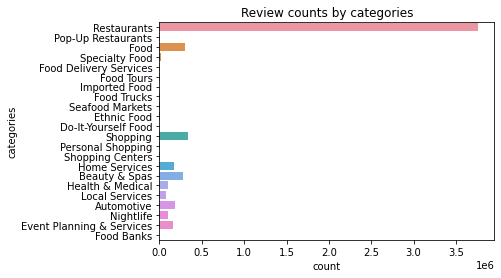

In [ ]:
sns.countplot(data=df, y="categories", )
plt.title("Review counts by categories")
# plt.yticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Reviews')

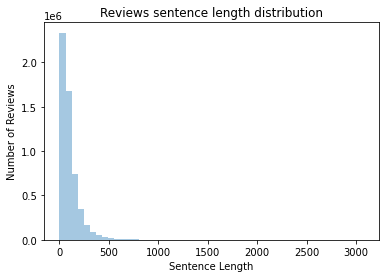

In [ ]:
sns.distplot(a=df["reviewLength"], kde=False)
plt.title("Reviews sentence length distribution")
plt.xlabel("Sentence Length")
plt.ylabel("Number of Reviews")

Text(0, 0.5, 'Number of Reviews')

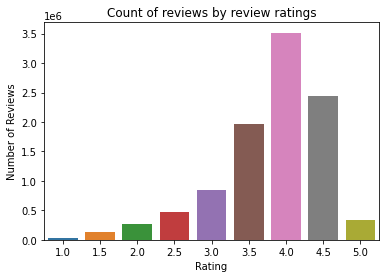

In [ ]:
sns.countplot(x=df["stars"])
plt.title("Count of reviews by review ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")

Text(0.5, 1.0, 'Ratings v/s Sentence Length')

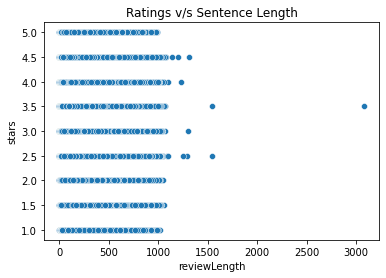

In [ ]:
sns.scatterplot(x=df['reviewLength'], y=df['stars'])
plt.title("Ratings v/s Sentence Length")

In [ ]:
gt350 = df[df["reviewLength"]>350]
gt350.shape

(154336, 16)

In [ ]:
lt350 = df[df["reviewLength"]<350]
lt350.shape

(5349859, 16)

There are more datapoints for reviews with length less than 350, than there are for reviews of length greater than 350

#Save Dataframe objects in the Drive

In [ ]:
df_auto = df[df['categories']=='Automotive']
df_auto.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,attributes,categories,user_id,review_stars,text,date
106213,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,AZ,85705,32.229872,-110.972342,4.5,"{'DriveThru': 'False', 'BusinessAcceptsCreditC...",Automotive,Grp5mXrdfv49MpoXoraIdg,5,I went in to get shocks for my shell and not o...,2018-02-03 21:57:47
106224,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,CA,93103,34.419620,-119.677032,4.5,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...",Automotive,IHDYJHlKPlLpVw3jokGezA,5,The absolute best service and results I've had...,2015-11-06 00:55:31


In [ ]:
df_auto.shape

(184986, 15)

In [ ]:
df_auto.to_pickle('AutoDF.pkl')

In [ ]:
#send to drive
#%mkdir /content/drive/MyDrive/YelpDataset/dataframes

In [ ]:
%cp /content/AutoDF.pkl /content/drive/MyDrive/YelpDataset/dataframes/

In [ ]:
catNoSpace = []
for cat in df.categories.value_counts()[5:10].index:
  temp = cat
  temp = temp.replace(" ","")
  catNoSpace.append(temp)
catNoSpace

['HomeServices',
 'EventPlanning&Services',
 'Health&Medical',
 'Nightlife',
 'LocalServices']

In [ ]:
i = 0
for cat in df.categories.value_counts()[5:10].index:
  dfToSave = df[df['categories']==cat]
  dfToSave.to_pickle(f'{catNoSpace[i]}DF.pkl')
  i+=1

In [ ]:
!ls

 AutoDF.pkl			 LocalServicesDF.pkl
 beautyandSpaDF.pkl		 NightlifeDF.pkl
 drive				 sample_data
'EventPlanning&ServicesDF.pkl'	 shoppingDF.pkl
 foodDF.pkl			 yelp_academic_dataset_business.json
'Health&MedicalDF.pkl'		 yelp_academic_dataset_review.json
 HomeServicesDF.pkl


In [ ]:
%cp /content/EventPlanningServicesDF.pkl /content/drive/MyDrive/YelpDataset/dataframes/
%cp /content/HealthMedicalDF.pkl /content/drive/MyDrive/YelpDataset/dataframes/
#%cp /content/HomeServicesDF.pkl /content/drive/MyDrive/YelpDataset/dataframes/
#%cp /content/LocalServicesDF.pkl /content/drive/MyDrive/YelpDataset/dataframes/
#%cp /content/NightlifeDF.pkl /content/drive/MyDrive/YelpDataset/dataframes/